Import section

In [ ]:
import tensorflow as tf
import numpy as np
import os
import shutil
import cv2
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

Functions

In [ ]:
#############################################################################################
# Name          : Plot_PredImg
# Description   : This API plots the images predicted by the Keras APIs
# Input         : Predicted values, image, expected output
# Output        : None
#############################################################################################

def Plot_PredImg( predictions_array, img, expected_label):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  #plt.imshow(img, cmap=plt.cm.binary)
  plt.imshow(img)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == expected_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(ds_class_names[predicted_label],
                                100*np.max(predictions_array),
                                ds_class_names[expected_label]),
                                color=color)


#############################################################################################
# Name          : Plot_PredVal
# Description   : This API plots the predicted values by the Keras APIs
# Input         : Predicted values, expected output
# Output        : None
#############################################################################################

def Plot_PredVal(predictions_array, expected_label):
  plt.grid(False)
  plt.xticks(range(num_classes))
  plt.yticks([])
  thisplot = plt.bar(range(num_classes), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[expected_label].set_color('blue')

 
#############################################################################################
# Name        : Store_NewImagesInDir
# Description : To store the newly generated images
# Input       : Image, directory path, file name
# Output      : None
#############################################################################################
def Store_NewImagesInDir(image_temp, store_dir_path, file_name):
    
    # Create directory if not existing
    if(os.path.exists(store_dir_path) == False):
        os.makedirs(store_dir_path)
    
    file_path= store_dir_path + '/' + file_name
    print(file_path)
    cv2.imwrite(file_path,image_temp)
    
    
#############################################################################################
# Name        : CannyEdge_Auto
# Description : To store the newly generated images
# Input       : Image, directory path, file name
# Output      : None
#############################################################################################
def CannyEdge_Auto(image, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(image)
	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv2.Canny(image, lower, upper)
	# return the edged image
	return edged
    
    
#end of function


############################# M A I N    S E C T I O N ######################################

In [ ]:
## Global values
# Number of classes
num_classes = 3
datasets_types = ['train','test']
data_classes = ['cups','dishes','plates']
# Desired image resolution
img_height = 256
img_width = 256
batch_size = 32
epochs_train = 10
# Path of train and test sets
dataset_subfolder =  'edgedetected'

#locpc cd_path = os.path.dirname(os.path.abspath(__file__)) #Current path
#dataset_folders = ['data','data_grp']
dataset_folders = ['data']
datasetNew_foldername = 'data'

From Google Drive

In [ ]:
# Directory to dataset in drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

cd_path = '/content/gdrive/MyDrive/MachineLearning/MoreData/'

Mounted at /content/gdrive


In [ ]:
# Use that as the dataset


#data_path_train = cd_path + '/' + datasetNew_foldername + '/' + dataset_subfolder + '/train'
#data_path_test = cd_path + '/' +  datasetNew_foldername + '/' + dataset_subfolder + '/test'
data_path_train = cd_path + '/' + datasetNew_foldername + '/'  + 'train'
data_path_test = cd_path + '/' +  datasetNew_foldername + '/'  + 'test'

####
# Prepare training and testing data
####
ds_train = tf.keras.utils.image_dataset_from_directory(
    data_path_train,
    color_mode = 'rgb',
    image_size=(img_height,img_width), # reshape
    shuffle = True,
    batch_size = batch_size,
    validation_split=0.2,
    subset="training",
    seed=100
)

ds_val = tf.keras.utils.image_dataset_from_directory(
    data_path_train,
    color_mode = 'rgb',
    image_size=(img_height,img_width), # reshape
    shuffle = True,
    batch_size = batch_size,
    validation_split=0.2,
    subset="validation",
    seed=100
)
  
ds_test = tf.keras.preprocessing.image_dataset_from_directory(
    data_path_test,
    color_mode = 'rgb',
    image_size=(img_height,img_width), # reshape
    shuffle = False,
    batch_size = batch_size,
    seed=123
)


# Read the class list from train or test set
ds_class_names = ds_train.class_names


Found 717 files belonging to 3 classes.
Using 574 files for training.
Found 717 files belonging to 3 classes.
Using 143 files for validation.
Found 152 files belonging to 3 classes.


In [ ]:

####
#  Building NN model
####
input_shape = (img_height, img_width, 3)

resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(img_height, img_width),
  tf.keras.layers.Rescaling(1./255, input_shape=input_shape)
])

model = tf.keras.Sequential([
    resize_and_rescale,
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1500, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


No GPU, using /device:CPU:0.
Epoch 1/15
18/18 [==============================] - 196s 8s/step - loss: 10.5534 - accuracy: 0.5993 - val_loss: 1.0727 - val_accuracy: 0.5315
Epoch 2/15
18/18 [==============================] - 111s 5s/step - loss: 0.3054 - accuracy: 0.9321 - val_loss: 1.1122 - val_accuracy: 0.3007
Epoch 3/15
18/18 [==============================] - 110s 5s/step - loss: 0.1611 - accuracy: 0.9495 - val_loss: 1.0954 - val_accuracy: 0.5455
Epoch 4/15
18/18 [==============================] - 116s 6s/step - loss: 0.1241 - accuracy: 0.9599 - val_loss: 1.0172 - val_accuracy: 0.5385
Epoch 5/15
18/18 [==============================] - 110s 5s/step - loss: 0.0814 - accuracy: 0.9739 - val_loss: 0.9417 - val_accuracy: 0.5455
Epoch 6/15
18/18 [==============================] - 110s 5s/step - loss: 0.0593 - accuracy: 0.9791 - val_loss: 0.8652 - val_accuracy: 0.8252
Epoch 7/15
18/18 [==============================] - 112s 5s/step - loss: 0.0361 - accuracy: 0.9948 - val_loss: 0.7809 - val_

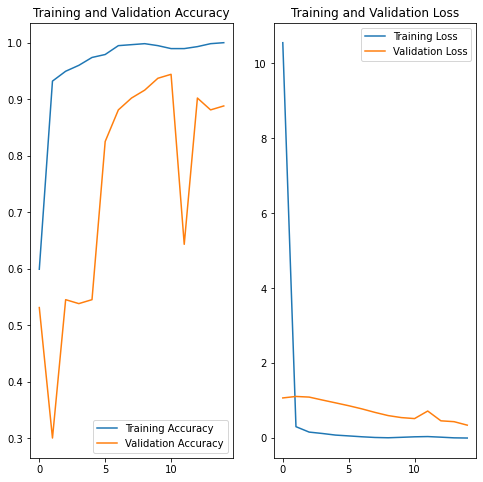

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])              
              
              

#GPU
device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))


with tf.device(device_name):

    history = model.fit(ds_train, validation_data=ds_val, epochs=epochs_train)


    # Accuracy evaluation
    test_loss, test_acc = model.evaluate(ds_test, verbose=2)
print('\nThe test accuracy : ', test_acc)


## Plotting the training
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs_train)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()





In [ ]:
# Making predictions
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(ds_test)